In [71]:
import os
import sys
import pandas as pd
import yfinance as yf
import plotly as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Import a class from the scripts

In [72]:
# Add the full path to the 'scripts' directory to sys.path
sys.path.append('c:\\Users\\Hp\\Desktop\\10_Academy\\week-1\\scripts')

# Attempt to import FinancialAnalyzer
try:
    from financial_analyzer import FinancialAnalyzer
    print("Module imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")


Module imported successfully.


### Stock analysis ('AAPL)

#### Read the raw data

In [73]:
# Load the CSV file of AAPL_historical_data into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\yfinance_data\AAPL_historical_data.csv')
# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head())

         Date      Open      High       Low     Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600


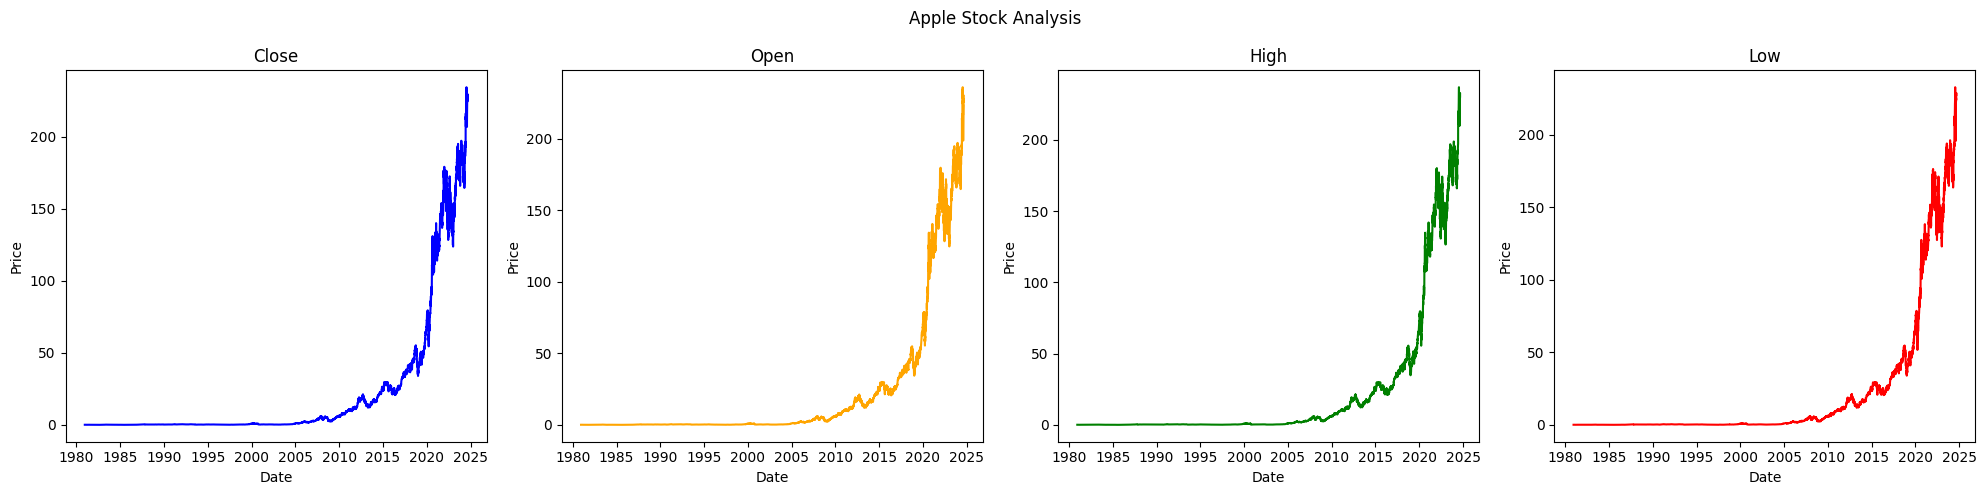

In [74]:
# Fetch the Apple stock data
AAPL = yf.Ticker("AAPL")
hist = AAPL.history(period="max")

# Create subplots with 1 row and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot 'Close' prices
axs[0].plot(hist.index, hist['Close'], color='blue')
axs[0].set_title('Close')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')

# Plot 'Open' prices
axs[1].plot(hist.index, hist['Open'], color='orange')
axs[1].set_title('Open')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')

# Plot 'High' prices
axs[2].plot(hist.index, hist['High'], color='green')
axs[2].set_title('High')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')

# Plot 'Low' prices
axs[3].plot(hist.index, hist['Low'], color='red')
axs[3].set_title('Low')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Price')

# Adjust the layout and display the plot
fig.suptitle('Apple Stock Analysis')
plt.tight_layout()
plt.show()


In [75]:
# Create an instance of the FinancialAnalyzer class

analyzer = FinancialAnalyzer('AAPL', '2020-01-01', '2020-12-31')

In [76]:
# Retrieve stock data
stock_data = analyzer.retrieve_stock_data()
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876106,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400558,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.200806,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.189499,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.810043,124486200


In [77]:
# Calculate technical indicators
stock_data_indicators = analyzer.calculate_technical_indicators(stock_data)
stock_data_indicators.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal
Date,,,,,,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.200806,88223700,124.106000,66.417825,124.898504,3.154518,2.500894
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.189499,54930100,124.903000,67.866386,125.571980,3.323474,2.665410
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.810043,124486200,125.908001,73.597952,126.630839,3.794496,2.891227
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.028397,121047300,126.699000,68.522632,127.415521,3.975103,3.108002
2020-12-30,135.580002,135.990005,133.399994,133.720001,130.902618,96452100,127.249000,65.451324,128.015948,3.979567,3.282315


In [78]:
%matplotlib inline
# Plot stock data
analyzer.plot_stock_data(stock_data)


In [79]:
# Plot RSI
analyzer.plot_rsi(stock_data)

In [80]:
# Plot EMA
analyzer.plot_ema(stock_data)

In [81]:
# Plot MACD
analyzer.plot_macd(stock_data)

### Stock Analysis "AMZN"

In [82]:
# Load the CSV file of AAPL_historical_data into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\yfinance_data\AMZN_historical_data.csv')

# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head())


         Date      Open      High       Low     Close      Volume
0  1997-05-15  0.121875  0.125000  0.096354  0.097917  1443120000
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   294000000
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   122136000
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   109344000
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   377064000


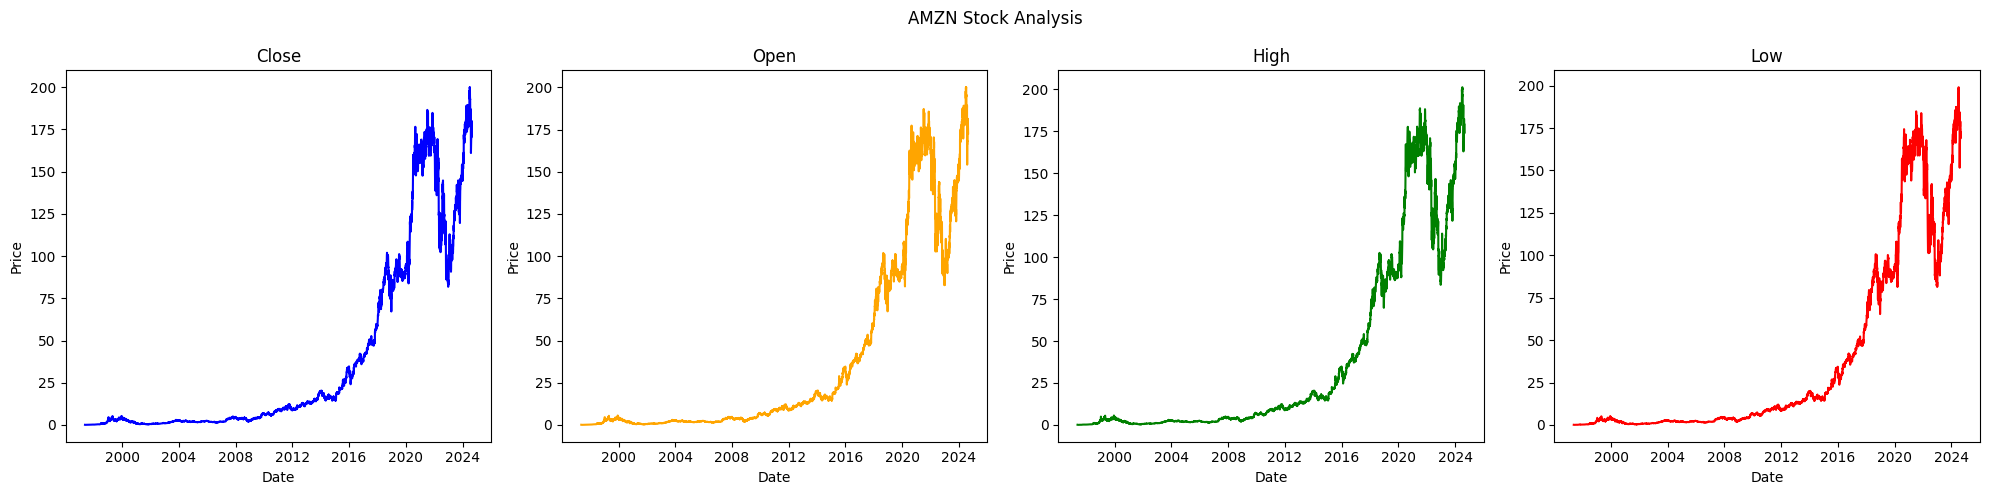

In [83]:
# Fetch the Apple stock data
AMZN = yf.Ticker("AMZN")
hist = AMZN.history(period="max")

# Create subplots with 1 row and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot 'Close' prices
axs[0].plot(hist.index, hist['Close'], color='blue')
axs[0].set_title('Close')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')

# Plot 'Open' prices
axs[1].plot(hist.index, hist['Open'], color='orange')
axs[1].set_title('Open')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')

# Plot 'High' prices
axs[2].plot(hist.index, hist['High'], color='green')
axs[2].set_title('High')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')

# Plot 'Low' prices
axs[3].plot(hist.index, hist['Low'], color='red')
axs[3].set_title('Low')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Price')

# Adjust the layout and display the plot
fig.suptitle('AMZN Stock Analysis')
plt.tight_layout()
plt.show()


In [84]:
# Create an instance of the FinancialAnalyzer class

analyzer = FinancialAnalyzer('AMZN', '2020-01-01', '2020-12-31')

In [85]:
# Retrieve stock data
stock_data = analyzer.retrieve_stock_data()
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...
2020-12-23,160.250000,160.506500,159.208496,159.263504,159.263504,41876000
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000


In [86]:
# Calculate technical indicators
stock_data_indicators = analyzer.calculate_technical_indicators(stock_data)
stock_data_indicators.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal
Date,,,,,,,,,,,
2020-12-23,160.250000,160.506500,159.208496,159.263504,159.263504,41876000,158.943800,51.353673,158.909041,0.551435,0.294464
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000,158.912850,49.701582,158.882895,0.456073,0.326786
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000,159.134400,61.499634,159.389095,0.819974,0.425423
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000,159.519301,64.560168,160.028229,1.247464,0.589831
2020-12-30,167.050003,167.104996,164.123505,164.292496,164.292496,64186000,159.683726,59.703015,160.434350,1.423987,0.756662


In [87]:
# Plot stock data
analyzer.plot_stock_data(stock_data)
# Plot RSI
analyzer.plot_rsi(stock_data)

# Plot EMA
analyzer.plot_ema(stock_data)

# Plot MACD
analyzer.plot_macd(stock_data)